In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime
import pandas as pd
from tqdm import tqdm
import bspline
import bspline.splinelab as splinelab
import sys
path = r'C:\Users\Yichen Jiang\Documents\PHD LIFE\Research\Hawkes Processes\Yelp'
sys.path.append(path)
from yelp_functions import *
from scipy.interpolate import splrep, BSpline

# Load R session

In [21]:
%load_ext rpy2.ipython

RuntimeError: R_USER not defined.

# Import business name

In [2]:
path = r'C:\Users\Yichen Jiang\Documents\PHD LIFE\Research\Hawkes Processes\Yelp'

path_business_withtext = os.path.join(path,'business with text features')

path_results = os.path.join(path,'results')

filenames = os.listdir(path_business_withtext)

results = os.listdir(path_results)

# OR choose business_id

In [114]:
#business_id = '2GmGT-7QjowR1ihup3FbVA' # review number: 825
#business_id = '0FUtlsQrJI7LhqDPxLumEw' # review number: 2097
#business_id = '2weQS-RnoOBhb1KsHKyoSQ' # review number: 4534
#business_id = 'RESDUcs7fIiihp38-d6_6g' # review number: 8568
#business_id = 'P7pxQFqr7yBKMMI2J51udw' # review number: 3225
#business_id = '--9e1ONYQuAa-CB_Rrw7Tw' # review number: 1661
#business_id = '4JNXUYY8wbaaDmk3BPzlWw' # review number: 8570
#business_id = 'DkYS3arLOhA8si5uUEmHOw' # review number: 5206
#business_id = '5LNZ67Yw9RD6nf4_UhXOjw' # review number: 4522
#business_id = 'K7lWdNUhCbcnEvI0NhGewg' # review number: 6887
#business_id = 'cYwJA2A6I12KNkm2rtXd5g' # review number: 5575
#business_id = 'uW6UHfONAmm8QttPkbMewQ' # review number: 1463
#business_id = 'S-oLPRdhlyL5HAknBKTUcQ' # review number: 1139
#business_id = 'AV6weBrZFFBfRGCbcRGO4g' # review number: 4240
#business_id = 'ebTvBxSStI9Vf5Tpux_X3Q' # review number: 1107
business_id = 'J1RDyyPxhioqm8c_fi4P4Q' # review number: 1023

# Define other terms

In [3]:
# list of deltas
list_deltas = [0.005, 0.05, 0.1, 1, 5]

# list of variables
list_variables = []
for i in range(0,5):
    list_variables.append(str(i+1)+'star')
list_variables += ['cool', 'funny', 'useful', 'average_stars', 'friend_count', 'elite_count', 'review_count', 'fan_count', 'yelping_since', 'mean_prob', 'mean_weight', 'sentiment_polarity', 'sentiment_subjectivity', 'text_length', 'textclean_length']

bspline_order = 3

knot_base = 'order' #'time' or 'order'

In [4]:
count = 0
list_knot_base = ['order','time']
list_record = []

In [7]:
results = os.listdir(path_results)
if 'time'and'order' in list_record:
    print(filenames[count].split('_with')[0]+ ' with all basis have been processed')
    count += 1
    list_record = []
if count <= len(filenames):
    for base in list_knot_base:
        if filenames[count].split('_with')[0]+'_'+str(base)+'.png' in results:
            print(filenames[count].split('_with')[0]+'_'+str(base)+'.png has already been processed')
            list_record.append(str(base))
        elif filenames[count].split('_with')[0]+'_'+str(base)+'.png' not in results:
            business_id = filenames[count].split('_with')[0]
            knot_base = base
            print('business_id is:',str(business_id),', knot_base is:',str(knot_base))
            break


business_id is: -050d_XIor1NpCuWkbIVaQ , knot_base is: order


In [10]:
print(business_id)
print(knot_base)
print('the next count is:',count)

-050d_XIor1NpCuWkbIVaQ
order
the next count is: 1


In [23]:
for filename in filenames:
    print(filename.split('_with')[0])
    # update results
    results = os.listdir(path_results)
    if filename.endswith('.json'):
        if filename.split('_with')[0]+'_'+'order'+'_coefficients.csv' not in results:
            knot_base = 'order'
            business_id = filename.split('_with')[0]
            print(business_id, knot_base)
            try:
                main(business_id,path,list_deltas,list_variables,bspline_order,knot_base)
            except KeyError as error:
                print(error)
        elif filename.split('_with')[0]+'_'+'order'+'_coefficients.csv' in results:
            print(filename.split('_with')[0] + 'in order base has been finished')

        if filename.split('_with')[0]+'_'+'time'+'_coefficients.csv' not in results:
            knot_base = 'time'
            business_id = filename.split('_with')[0]
            print(business_id, knot_base)
            try:
                main(business_id,path,list_deltas,list_variables,bspline_order,knot_base)
            except KeyError as error:
                print(error)
        elif filename.split('_with')[0]+'_'+'time'+'_coefficients.csv' in results:
            print(filename.split('_with')[0] + 'in time base has been finished')    

--9e1ONYQuAa-CB_Rrw7Tw
--9e1ONYQuAa-CB_Rrw7Twin order base has been finished
--9e1ONYQuAa-CB_Rrw7Twin time base has been finished
-050d_XIor1NpCuWkbIVaQ
-050d_XIor1NpCuWkbIVaQin order base has been finished
-050d_XIor1NpCuWkbIVaQin time base has been finished
-3zffZUHoY8bQjGfPSoBKQ
-3zffZUHoY8bQjGfPSoBKQin order base has been finished
-3zffZUHoY8bQjGfPSoBKQin time base has been finished
-6h3K1hj0d4DRcZNUtHDuw
-6h3K1hj0d4DRcZNUtHDuwin order base has been finished
-6h3K1hj0d4DRcZNUtHDuwin time base has been finished
-6tvduBzjLI1ISfs3F_qTg
-6tvduBzjLI1ISfs3F_qTgin order base has been finished
-6tvduBzjLI1ISfs3F_qTgin time base has been finished
-7H-oXvCxJzuT42ky6Db0g
-7H-oXvCxJzuT42ky6Db0gin order base has been finished
-7H-oXvCxJzuT42ky6Db0gin time base has been finished
-95mbLJsa0CxXhpaNL4LvA
-95mbLJsa0CxXhpaNL4LvAin order base has been finished
-95mbLJsa0CxXhpaNL4LvAin time base has been finished
-a857YYdjzgOdOjFFRsRXQ
-a857YYdjzgOdOjFFRsRXQin order base has been finished
-a857YYdjzgOd

6t7mlTVjDA9fhuFAZmVzAQ
6t7mlTVjDA9fhuFAZmVzAQin order base has been finished
6t7mlTVjDA9fhuFAZmVzAQin time base has been finished
6tSvz_21BMo3a4GaItwa0g
6tSvz_21BMo3a4GaItwa0gin order base has been finished
6tSvz_21BMo3a4GaItwa0gin time base has been finished
6Vyp-9i1jzwK_bvisuPJpQ
6Vyp-9i1jzwK_bvisuPJpQin order base has been finished
6Vyp-9i1jzwK_bvisuPJpQin time base has been finished
6V_7ldr9tjmet0BdAnC34A
6V_7ldr9tjmet0BdAnC34Ain order base has been finished
6V_7ldr9tjmet0BdAnC34Ain time base has been finished
6xgcHeLad-VaoTIQewK84A
6xgcHeLad-VaoTIQewK84Ain order base has been finished
6xgcHeLad-VaoTIQewK84Ain time base has been finished
6ZIHxvFTHC1pvAzAS0uLDA
6ZIHxvFTHC1pvAzAS0uLDAin order base has been finished
6ZIHxvFTHC1pvAzAS0uLDAin time base has been finished
73_UT7fZ7mzXcguX8-oSuQ
73_UT7fZ7mzXcguX8-oSuQin order base has been finished
73_UT7fZ7mzXcguX8-oSuQin time base has been finished
77h11eWv6HKJAgojLx8G4w
77h11eWv6HKJAgojLx8G4win order base has been finished
77h11eWv6HKJA

C8D_GU9cDDjbOJfCaGXxDQin time base has been finished
C9ImzBi5fn742ZcAYDww2A
C9ImzBi5fn742ZcAYDww2Ain order base has been finished
C9ImzBi5fn742ZcAYDww2Ain time base has been finished
CauQnqZ5eowyrr7oWF_p3Q
CauQnqZ5eowyrr7oWF_p3Qin order base has been finished
CauQnqZ5eowyrr7oWF_p3Qin time base has been finished
CCRgGKhzxSpl38w7yhqKUw
CCRgGKhzxSpl38w7yhqKUwin order base has been finished
CCRgGKhzxSpl38w7yhqKUwin time base has been finished
cHdJXLlKNWixBXpDwEGb_A
cHdJXLlKNWixBXpDwEGb_Ain order base has been finished
cHdJXLlKNWixBXpDwEGb_Ain time base has been finished
CiYLq33nAyghFkUR15pP-Q
CiYLq33nAyghFkUR15pP-Qin order base has been finished
CiYLq33nAyghFkUR15pP-Qin time base has been finished
cJWbbvGmyhFiBpG_5hf5LA
cJWbbvGmyhFiBpG_5hf5LAin order base has been finished
cJWbbvGmyhFiBpG_5hf5LAin time base has been finished
cKdox2gt3L1Dbb7MpOPdWg
cKdox2gt3L1Dbb7MpOPdWgin order base has been finished
cKdox2gt3L1Dbb7MpOPdWgin time base has been finished
cKgUCzMGuRgkbKXUsgeXUw
cKgUCzMGuRgkbK

ewmTwsZqCHH2gvCeDKz0dwin time base has been finished
eYJcI9cI6-kJ2NQpYdHcLw
eYJcI9cI6-kJ2NQpYdHcLwin order base has been finished
eYJcI9cI6-kJ2NQpYdHcLwin time base has been finished
eZcCFV-8X91ZSnmB9807bw
eZcCFV-8X91ZSnmB9807bwin order base has been finished
eZcCFV-8X91ZSnmB9807bwin time base has been finished
F2pfjAZ_3dMTGCKv6c5wOw
F2pfjAZ_3dMTGCKv6c5wOwin order base has been finished
F2pfjAZ_3dMTGCKv6c5wOwin time base has been finished
f4kNNLU_0q_2J711jCN7dA
f4kNNLU_0q_2J711jCN7dAin order base has been finished
f4kNNLU_0q_2J711jCN7dAin time base has been finished
f4x1YBxkLrZg652xt2KR5g
f4x1YBxkLrZg652xt2KR5gin order base has been finished
f4x1YBxkLrZg652xt2KR5gin time base has been finished
f5O7v_X_jCg2itqacRfxhg
f5O7v_X_jCg2itqacRfxhgin order base has been finished
f5O7v_X_jCg2itqacRfxhgin time base has been finished
f8IMQgRwo-8GP372MElDGQ
f8IMQgRwo-8GP372MElDGQin order base has been finished
f8IMQgRwo-8GP372MElDGQin time base has been finished
f9sU31meK0bqAD7922sCog
f9sU31meK0bqAD

ii8sAGBexBOJoYRFafF9XQin time base has been finished
iIwKW2cBAxjElE8eUzjwqA
iIwKW2cBAxjElE8eUzjwqAin order base has been finished
iIwKW2cBAxjElE8eUzjwqAin time base has been finished
iJi7yebXoPVXRyGqqL-v8g
iJi7yebXoPVXRyGqqL-v8gin order base has been finished
iJi7yebXoPVXRyGqqL-v8gin time base has been finished
IMLrj2klosTFvPRLv56cng
IMLrj2klosTFvPRLv56cngin order base has been finished
IMLrj2klosTFvPRLv56cngin time base has been finished
iOt7ebp4Zy-5YUjHL1rbmQ
iOt7ebp4Zy-5YUjHL1rbmQin order base has been finished
iOt7ebp4Zy-5YUjHL1rbmQin time base has been finished
Iq7NqQD-sESu3vr9iEGuTA
Iq7NqQD-sESu3vr9iEGuTAin order base has been finished
Iq7NqQD-sESu3vr9iEGuTAin time base has been finished
IqCvkoDvvImXuzGrpeiDMA
IqCvkoDvvImXuzGrpeiDMAin order base has been finished
IqCvkoDvvImXuzGrpeiDMAin time base has been finished
IRbgMt0cVuzK1KSppU16_Q
IRbgMt0cVuzK1KSppU16_Qin order base has been finished
IRbgMt0cVuzK1KSppU16_Qin time base has been finished
IRzXVRIzRoYpnjaVXF3vNA
IRzXVRIzRoYpnj

M51gw2cz_vXarNBLbKkOxQin time base has been finished
makqSKZaz1aUipoWBW0BsA
makqSKZaz1aUipoWBW0BsAin order base has been finished
makqSKZaz1aUipoWBW0BsAin time base has been finished
MAuSh7NKoT__CQ4BumoayA
MAuSh7NKoT__CQ4BumoayAin order base has been finished
MAuSh7NKoT__CQ4BumoayAin time base has been finished
mC39IrCp36QIVFRZIw9PTQ
mC39IrCp36QIVFRZIw9PTQin order base has been finished
mC39IrCp36QIVFRZIw9PTQin time base has been finished
Md6895ZtS3FA8a0pUaH6nw
Md6895ZtS3FA8a0pUaH6nwin order base has been finished
Md6895ZtS3FA8a0pUaH6nwin time base has been finished
mDR12Hafvr84ctpsV6YLag
mDR12Hafvr84ctpsV6YLagin order base has been finished
mDR12Hafvr84ctpsV6YLagin time base has been finished
meXjqyhTNLFmknY39y2sMg
meXjqyhTNLFmknY39y2sMgin order base has been finished
meXjqyhTNLFmknY39y2sMgin time base has been finished
mG71gQ5HWl7ut9OCN6NJKA
mG71gQ5HWl7ut9OCN6NJKAin order base has been finished
mG71gQ5HWl7ut9OCN6NJKAin time base has been finished
MgHWbwuxxb_txhI3lK_bKg
MgHWbwuxxb_txh

pjpUOlJLlkIxBZ5BquA2PAin time base has been finished
pKk7jCFIm96qDdk0laVT2w
pKk7jCFIm96qDdk0laVT2win order base has been finished
pKk7jCFIm96qDdk0laVT2win time base has been finished
PkqN5st3zZ_Xce_5QlBtNQ
PkqN5st3zZ_Xce_5QlBtNQin order base has been finished
PkqN5st3zZ_Xce_5QlBtNQin time base has been finished
pLMPpaJ7whp86uL_3ezwMg
pLMPpaJ7whp86uL_3ezwMgin order base has been finished
pLMPpaJ7whp86uL_3ezwMgin time base has been finished
plWuv4gda7m0KlqCNhrb4w
plWuv4gda7m0KlqCNhrb4win order base has been finished
plWuv4gda7m0KlqCNhrb4win time base has been finished
PNTyiqS7R-0c1ofxOfDijQ
PNTyiqS7R-0c1ofxOfDijQin order base has been finished
PNTyiqS7R-0c1ofxOfDijQin time base has been finished
pomGBqfbxcqPv14c3XH-ZQ
pomGBqfbxcqPv14c3XH-ZQin order base has been finished
pomGBqfbxcqPv14c3XH-ZQin time base has been finished
poYsvuOmVDqF4dTnjJ780A
poYsvuOmVDqF4dTnjJ780Ain order base has been finished
poYsvuOmVDqF4dTnjJ780Ain time base has been finished
PQER4ba8Q0zqB1G2QiXamQ
PQER4ba8Q0zqB1

SZEFE5hL7aN5nM-A44iPwQin time base has been finished
T-KniGykrZ46ZC9plOTspw
T-KniGykrZ46ZC9plOTspwin order base has been finished
T-KniGykrZ46ZC9plOTspwin time base has been finished
T0Uw6vwwfO3el29wBoDamQ
T0Uw6vwwfO3el29wBoDamQin order base has been finished
T0Uw6vwwfO3el29wBoDamQin time base has been finished
T2tEMLpTeSMxLKpxwFdS3g
T2tEMLpTeSMxLKpxwFdS3gin order base has been finished
T2tEMLpTeSMxLKpxwFdS3gin time base has been finished
t33qVzQ6AdSiq4lnI0KOyg
t33qVzQ6AdSiq4lnI0KOygin order base has been finished
t33qVzQ6AdSiq4lnI0KOygin time base has been finished
t53w4JlkxTau-G-TzhSWog
t53w4JlkxTau-G-TzhSWogin order base has been finished
t53w4JlkxTau-G-TzhSWogin time base has been finished
tcfL9_Qe-12eX4rdmK_6XA
tcfL9_Qe-12eX4rdmK_6XAin order base has been finished
tcfL9_Qe-12eX4rdmK_6XAin time base has been finished
TCoBE_BkDRrK0bWrh5VueQ
TCoBE_BkDRrK0bWrh5VueQin order base has been finished
TCoBE_BkDRrK0bWrh5VueQin time base has been finished
TCWMgOiV0PxQkWE1SyBIWQ
TCWMgOiV0PxQkW

100%|████████████████████████████████████████████████████████████████████████████████| 591/591 [00:23<00:00, 24.96it/s]


Uxm9N6jwmJybOv1NcBbnRw time


100%|████████████████████████████████████████████████████████████████████████████████| 591/591 [00:16<00:00, 34.88it/s]


UYh1N1xQhOh-a7nX92xPzQ
UYh1N1xQhOh-a7nX92xPzQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1294/1294 [00:45<00:00, 28.65it/s]


UYh1N1xQhOh-a7nX92xPzQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1294/1294 [00:44<00:00, 28.98it/s]


u_8cVZyxh0J468zEZUjNDQ
u_8cVZyxh0J468zEZUjNDQ order


100%|████████████████████████████████████████████████████████████████████████████████| 649/649 [00:18<00:00, 34.73it/s]


u_8cVZyxh0J468zEZUjNDQ time


100%|████████████████████████████████████████████████████████████████████████████████| 649/649 [00:18<00:00, 35.02it/s]


V-0qRzBHKixmQgon_fW_AA
V-0qRzBHKixmQgon_fW_AA order


100%|████████████████████████████████████████████████████████████████████████████████| 561/561 [00:15<00:00, 35.96it/s]


V-0qRzBHKixmQgon_fW_AA time


100%|████████████████████████████████████████████████████████████████████████████████| 561/561 [00:15<00:00, 36.21it/s]


v1AE1LLWDOqe8ubOzqKADg
v1AE1LLWDOqe8ubOzqKADg order


100%|████████████████████████████████████████████████████████████████████████████████| 903/903 [00:28<00:00, 32.08it/s]


v1AE1LLWDOqe8ubOzqKADg time


100%|████████████████████████████████████████████████████████████████████████████████| 903/903 [00:28<00:00, 27.06it/s]


v9u0NgjA4iQeKGevFnYSCA
v9u0NgjA4iQeKGevFnYSCA order


100%|████████████████████████████████████████████████████████████████████████████████| 543/543 [00:15<00:00, 35.60it/s]


v9u0NgjA4iQeKGevFnYSCA time


100%|████████████████████████████████████████████████████████████████████████████████| 543/543 [00:20<00:00, 18.40it/s]


Vay9xHwcvu7VRZOddBgn-A
Vay9xHwcvu7VRZOddBgn-A order


100%|████████████████████████████████████████████████████████████████████████████████| 630/630 [00:21<00:00, 29.29it/s]


Vay9xHwcvu7VRZOddBgn-A time


100%|████████████████████████████████████████████████████████████████████████████████| 630/630 [00:19<00:00, 28.00it/s]


vdloJPM3bSpQTMlwdFek2A
vdloJPM3bSpQTMlwdFek2A order


100%|████████████████████████████████████████████████████████████████████████████████| 551/551 [00:19<00:00, 28.65it/s]


vdloJPM3bSpQTMlwdFek2A time


100%|████████████████████████████████████████████████████████████████████████████████| 551/551 [00:17<00:00, 28.15it/s]


VG0nWxGsPixYLsyi49gyxQ
VG0nWxGsPixYLsyi49gyxQ order


100%|████████████████████████████████████████████████████████████████████████████████| 910/910 [00:31<00:00, 28.68it/s]


VG0nWxGsPixYLsyi49gyxQ time


100%|████████████████████████████████████████████████████████████████████████████████| 910/910 [00:31<00:00, 29.26it/s]


VGWEpMEkzQopS5lUNd06Sw
VGWEpMEkzQopS5lUNd06Sw order


100%|████████████████████████████████████████████████████████████████████████████████| 650/650 [00:21<00:00, 20.57it/s]


VGWEpMEkzQopS5lUNd06Sw time


100%|████████████████████████████████████████████████████████████████████████████████| 650/650 [00:20<00:00, 26.39it/s]


VH3WA7a-OVzFj2K_SP4BIw
VH3WA7a-OVzFj2K_SP4BIw order


100%|████████████████████████████████████████████████████████████████████████████████| 555/555 [00:16<00:00, 33.45it/s]


VH3WA7a-OVzFj2K_SP4BIw time


100%|████████████████████████████████████████████████████████████████████████████████| 555/555 [00:16<00:00, 34.45it/s]


vHz2RLtfUMVRPFmd7VBEHA
vHz2RLtfUMVRPFmd7VBEHA order


100%|██████████████████████████████████████████████████████████████████████████████| 2078/2078 [01:16<00:00, 27.13it/s]


vHz2RLtfUMVRPFmd7VBEHA time


100%|██████████████████████████████████████████████████████████████████████████████| 2078/2078 [01:14<00:00, 26.83it/s]


VHZPbCbIPHEkKOotdCTiow
VHZPbCbIPHEkKOotdCTiow order


100%|████████████████████████████████████████████████████████████████████████████████| 757/757 [00:23<00:00, 32.04it/s]


VHZPbCbIPHEkKOotdCTiow time


100%|████████████████████████████████████████████████████████████████████████████████| 757/757 [00:23<00:00, 32.46it/s]


VIJ2KiDKhUVhhpNylEIfog
VIJ2KiDKhUVhhpNylEIfog order


100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:15<00:00, 34.13it/s]


VIJ2KiDKhUVhhpNylEIfog time


100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:15<00:00, 35.92it/s]


vjaHGc25CcyNPZTbjDa7Ww
vjaHGc25CcyNPZTbjDa7Ww order


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [00:19<00:00, 33.99it/s]


vjaHGc25CcyNPZTbjDa7Ww time


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [00:19<00:00, 34.26it/s]


vjhB95c5nOXflNoyq_jKzw
vjhB95c5nOXflNoyq_jKzw order


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:20<00:00, 32.73it/s]


vjhB95c5nOXflNoyq_jKzw time


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:28<00:00, 20.75it/s]


vK1_qKEG7zHvjiTOsN0CRg
vK1_qKEG7zHvjiTOsN0CRg order


100%|████████████████████████████████████████████████████████████████████████████████| 961/961 [00:41<00:00, 22.94it/s]


vK1_qKEG7zHvjiTOsN0CRg time


100%|████████████████████████████████████████████████████████████████████████████████| 961/961 [00:31<00:00, 30.76it/s]


vl1aHp6pvnSmpoRQShWLjg
vl1aHp6pvnSmpoRQShWLjg order


100%|████████████████████████████████████████████████████████████████████████████████| 684/684 [00:21<00:00, 32.42it/s]


vl1aHp6pvnSmpoRQShWLjg time


100%|████████████████████████████████████████████████████████████████████████████████| 684/684 [00:19<00:00, 35.39it/s]


vl2IZrNJEA8npSjqXbdwxw
vl2IZrNJEA8npSjqXbdwxw order


100%|██████████████████████████████████████████████████████████████████████████████| 1284/1284 [00:40<00:00, 31.56it/s]


vl2IZrNJEA8npSjqXbdwxw time


100%|██████████████████████████████████████████████████████████████████████████████| 1284/1284 [00:39<00:00, 32.55it/s]


VLDFjeqpUgWhnVuB_8GuEg
VLDFjeqpUgWhnVuB_8GuEg order


100%|██████████████████████████████████████████████████████████████████████████████| 1150/1150 [00:34<00:00, 33.67it/s]


VLDFjeqpUgWhnVuB_8GuEg time


100%|██████████████████████████████████████████████████████████████████████████████| 1150/1150 [00:33<00:00, 33.83it/s]


VMr8sgoQOW0fo0qVJENajA
VMr8sgoQOW0fo0qVJENajA order


100%|████████████████████████████████████████████████████████████████████████████████| 815/815 [00:22<00:00, 35.84it/s]


VMr8sgoQOW0fo0qVJENajA time


100%|████████████████████████████████████████████████████████████████████████████████| 815/815 [00:22<00:00, 36.11it/s]


VMXl3Dm1Nwvgwo1PVYTXbg
VMXl3Dm1Nwvgwo1PVYTXbg order


100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [00:18<00:00, 36.98it/s]


VMXl3Dm1Nwvgwo1PVYTXbg time


100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [00:18<00:00, 30.26it/s]


Voeq7aGDmCGMjE_SQiHwRA
Voeq7aGDmCGMjE_SQiHwRA order


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [00:17<00:00, 37.88it/s]


Voeq7aGDmCGMjE_SQiHwRA time


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [00:17<00:00, 31.91it/s]


vOfz55MmWgjNQ3BA2PnhgQ
vOfz55MmWgjNQ3BA2PnhgQ order


100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [00:18<00:00, 36.86it/s]


vOfz55MmWgjNQ3BA2PnhgQ time


100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [00:19<00:00, 34.39it/s]


VR8QvH2g-jEG5EfMzA_G9w
VR8QvH2g-jEG5EfMzA_G9w order


100%|██████████████████████████████████████████████████████████████████████████████| 1169/1169 [00:35<00:00, 29.31it/s]


VR8QvH2g-jEG5EfMzA_G9w time


100%|██████████████████████████████████████████████████████████████████████████████| 1169/1169 [00:35<00:00, 33.38it/s]


VrGI7_nRjXpn0415S3coGQ
VrGI7_nRjXpn0415S3coGQ order


100%|████████████████████████████████████████████████████████████████████████████████| 752/752 [00:21<00:00, 35.64it/s]


VrGI7_nRjXpn0415S3coGQ time


100%|████████████████████████████████████████████████████████████████████████████████| 752/752 [00:21<00:00, 29.72it/s]


Vs7gc9EE3k9wARuUcN9piA
Vs7gc9EE3k9wARuUcN9piA order


100%|████████████████████████████████████████████████████████████████████████████████| 708/708 [00:19<00:00, 30.61it/s]


Vs7gc9EE3k9wARuUcN9piA time


100%|████████████████████████████████████████████████████████████████████████████████| 708/708 [00:19<00:00, 36.64it/s]


VsewHMsfj1Mgsl2i_hio7w
VsewHMsfj1Mgsl2i_hio7w order


100%|██████████████████████████████████████████████████████████████████████████████| 1703/1703 [00:54<00:00, 31.41it/s]


VsewHMsfj1Mgsl2i_hio7w time


100%|██████████████████████████████████████████████████████████████████████████████| 1703/1703 [00:54<00:00, 31.24it/s]


vsFFbN71ehRCp46KeR5RdQ
vsFFbN71ehRCp46KeR5RdQ order


100%|████████████████████████████████████████████████████████████████████████████████| 913/913 [00:27<00:00, 33.71it/s]


vsFFbN71ehRCp46KeR5RdQ time


100%|████████████████████████████████████████████████████████████████████████████████| 913/913 [00:26<00:00, 30.08it/s]


VSX3ixrqQFwwGBUf15s0EQ
VSX3ixrqQFwwGBUf15s0EQ order


100%|████████████████████████████████████████████████████████████████████████████████| 588/588 [00:14<00:00, 39.67it/s]


VSX3ixrqQFwwGBUf15s0EQ time


100%|████████████████████████████████████████████████████████████████████████████████| 588/588 [00:17<00:00, 32.78it/s]


VUtazCTIc0aoOrQprP_s-Q
VUtazCTIc0aoOrQprP_s-Q order


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:18<00:00, 34.92it/s]


VUtazCTIc0aoOrQprP_s-Q time


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:18<00:00, 36.05it/s]


vx4YAA02Qz6khRD1fZ1MFA
vx4YAA02Qz6khRD1fZ1MFA order


100%|██████████████████████████████████████████████████████████████████████████████| 1046/1046 [00:32<00:00, 32.51it/s]


vx4YAA02Qz6khRD1fZ1MFA time


100%|██████████████████████████████████████████████████████████████████████████████| 1046/1046 [00:31<00:00, 32.85it/s]


VyVIneSU7XAWgMBllI6LnQ
VyVIneSU7XAWgMBllI6LnQ order


100%|██████████████████████████████████████████████████████████████████████████████| 2662/2662 [01:25<00:00, 31.06it/s]


VyVIneSU7XAWgMBllI6LnQ time


100%|██████████████████████████████████████████████████████████████████████████████| 2662/2662 [01:26<00:00, 30.88it/s]


vz8HFGsITt6aj-nyXkAEFg
vz8HFGsITt6aj-nyXkAEFg order


100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [00:18<00:00, 37.00it/s]


vz8HFGsITt6aj-nyXkAEFg time


100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [00:17<00:00, 37.87it/s]


vZLAmpN-hTI3GCT9hlHVUA
vZLAmpN-hTI3GCT9hlHVUA order


100%|████████████████████████████████████████████████████████████████████████████████| 513/513 [00:12<00:00, 39.83it/s]


vZLAmpN-hTI3GCT9hlHVUA time


100%|████████████████████████████████████████████████████████████████████████████████| 513/513 [00:12<00:00, 40.24it/s]


v_yCY6NCwxCPIsNZR80UfQ
v_yCY6NCwxCPIsNZR80UfQ order


100%|████████████████████████████████████████████████████████████████████████████████| 908/908 [00:26<00:00, 34.87it/s]


v_yCY6NCwxCPIsNZR80UfQ time


100%|████████████████████████████████████████████████████████████████████████████████| 908/908 [00:28<00:00, 32.38it/s]


w12x7UBSSRsdbp3ZqguG3Q
w12x7UBSSRsdbp3ZqguG3Q order


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:20<00:00, 36.51it/s]


w12x7UBSSRsdbp3ZqguG3Q time


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:20<00:00, 36.72it/s]


w5CSi-An5meLnxjKSFn0wQ
w5CSi-An5meLnxjKSFn0wQ order


100%|████████████████████████████████████████████████████████████████████████████████| 855/855 [00:23<00:00, 36.23it/s]


w5CSi-An5meLnxjKSFn0wQ time


100%|████████████████████████████████████████████████████████████████████████████████| 855/855 [00:23<00:00, 29.10it/s]


W8apgXmOxESpoL_EeogC5w
W8apgXmOxESpoL_EeogC5w order


100%|████████████████████████████████████████████████████████████████████████████████| 941/941 [00:27<00:00, 34.22it/s]


W8apgXmOxESpoL_EeogC5w time


100%|████████████████████████████████████████████████████████████████████████████████| 941/941 [00:27<00:00, 34.36it/s]


w8RWhhuKxMiFCpvFvIQ3zg
w8RWhhuKxMiFCpvFvIQ3zg order


100%|████████████████████████████████████████████████████████████████████████████████| 986/986 [00:29<00:00, 33.44it/s]


w8RWhhuKxMiFCpvFvIQ3zg time


100%|████████████████████████████████████████████████████████████████████████████████| 986/986 [00:29<00:00, 33.38it/s]


W9y-Bl9030-rmfxSTmUD_g
W9y-Bl9030-rmfxSTmUD_g order


100%|████████████████████████████████████████████████████████████████████████████████| 594/594 [00:14<00:00, 39.73it/s]


W9y-Bl9030-rmfxSTmUD_g time


100%|████████████████████████████████████████████████████████████████████████████████| 594/594 [00:15<00:00, 39.44it/s]


wa8QgXQu1ZxwPgdRl9lYlg
wa8QgXQu1ZxwPgdRl9lYlg order


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [00:16<00:00, 38.99it/s]


wa8QgXQu1ZxwPgdRl9lYlg time


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [00:18<00:00, 33.07it/s]


wArcCMVnrl_tc9MULW-0CQ
wArcCMVnrl_tc9MULW-0CQ order


100%|████████████████████████████████████████████████████████████████████████████████| 609/609 [00:17<00:00, 34.89it/s]


wArcCMVnrl_tc9MULW-0CQ time


100%|████████████████████████████████████████████████████████████████████████████████| 609/609 [00:17<00:00, 31.51it/s]


WbJ1LRQdOuYYlRLyTkuuxw
WbJ1LRQdOuYYlRLyTkuuxw order


100%|██████████████████████████████████████████████████████████████████████████████| 1561/1561 [00:48<00:00, 31.86it/s]


WbJ1LRQdOuYYlRLyTkuuxw time


100%|██████████████████████████████████████████████████████████████████████████████| 1561/1561 [00:47<00:00, 29.33it/s]


WBt2pa7k_K2LKW2OJuXG9Q
WBt2pa7k_K2LKW2OJuXG9Q order


100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [00:19<00:00, 30.44it/s]


WBt2pa7k_K2LKW2OJuXG9Q time


100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [00:19<00:00, 36.70it/s]


Wc9UpJhOcdSj7olZkz7SJA
Wc9UpJhOcdSj7olZkz7SJA order


100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:26<00:00, 35.25it/s]


Wc9UpJhOcdSj7olZkz7SJA time


100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:26<00:00, 35.01it/s]


WETHRoXB2IbixndSlOktJA
WETHRoXB2IbixndSlOktJA order


100%|████████████████████████████████████████████████████████████████████████████████| 585/585 [00:15<00:00, 38.90it/s]


WETHRoXB2IbixndSlOktJA time


100%|████████████████████████████████████████████████████████████████████████████████| 585/585 [00:15<00:00, 38.69it/s]


whAwdYVty-jSNRhrYT2zHA
whAwdYVty-jSNRhrYT2zHA order


100%|██████████████████████████████████████████████████████████████████████████████| 1572/1572 [00:48<00:00, 30.39it/s]


whAwdYVty-jSNRhrYT2zHA time


100%|██████████████████████████████████████████████████████████████████████████████| 1572/1572 [00:50<00:00, 29.92it/s]


wHVWfC_a6koeiJXAu78e1g
wHVWfC_a6koeiJXAu78e1g order


100%|████████████████████████████████████████████████████████████████████████████████| 869/869 [00:25<00:00, 29.54it/s]


wHVWfC_a6koeiJXAu78e1g time


100%|████████████████████████████████████████████████████████████████████████████████| 869/869 [00:24<00:00, 23.82it/s]


wKA2y-F_fPcBDOkpzDB9eQ
wKA2y-F_fPcBDOkpzDB9eQ order


100%|████████████████████████████████████████████████████████████████████████████████| 689/689 [00:18<00:00, 37.75it/s]


wKA2y-F_fPcBDOkpzDB9eQ time


100%|████████████████████████████████████████████████████████████████████████████████| 689/689 [00:18<00:00, 37.80it/s]


wl0QZqAzr1DelslQ02JGCQ
wl0QZqAzr1DelslQ02JGCQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1662/1662 [00:52<00:00, 31.38it/s]


wl0QZqAzr1DelslQ02JGCQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1662/1662 [00:53<00:00, 31.19it/s]


wmCBxE0PfLZD8sxIwAY59Q
wmCBxE0PfLZD8sxIwAY59Q order


100%|████████████████████████████████████████████████████████████████████████████████| 696/696 [00:19<00:00, 36.58it/s]


wmCBxE0PfLZD8sxIwAY59Q time


100%|████████████████████████████████████████████████████████████████████████████████| 696/696 [00:19<00:00, 30.79it/s]


woXlprCuowrLJswWere3TQ
woXlprCuowrLJswWere3TQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:34<00:00, 33.06it/s]


woXlprCuowrLJswWere3TQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:34<00:00, 33.26it/s]


WpI5MZC3XzlTpcUOKXzCbA
WpI5MZC3XzlTpcUOKXzCbA order


100%|██████████████████████████████████████████████████████████████████████████████| 1101/1101 [00:36<00:00, 30.22it/s]


WpI5MZC3XzlTpcUOKXzCbA time


100%|██████████████████████████████████████████████████████████████████████████████| 1101/1101 [00:33<00:00, 33.36it/s]


wPiRP76arN0NB3M1ZXXp7g
wPiRP76arN0NB3M1ZXXp7g order


100%|████████████████████████████████████████████████████████████████████████████████| 616/616 [00:16<00:00, 38.33it/s]


wPiRP76arN0NB3M1ZXXp7g time


100%|████████████████████████████████████████████████████████████████████████████████| 616/616 [00:16<00:00, 38.21it/s]


wpnLPAnkMEb1NpC3xiD_qg
wpnLPAnkMEb1NpC3xiD_qg order


100%|████████████████████████████████████████████████████████████████████████████████| 711/711 [00:19<00:00, 36.82it/s]


wpnLPAnkMEb1NpC3xiD_qg time


100%|████████████████████████████████████████████████████████████████████████████████| 711/711 [00:19<00:00, 36.86it/s]


WRQ-9LluyivReFiQZFUujw
WRQ-9LluyivReFiQZFUujw order


100%|████████████████████████████████████████████████████████████████████████████████| 899/899 [00:25<00:00, 34.80it/s]


WRQ-9LluyivReFiQZFUujw time


100%|████████████████████████████████████████████████████████████████████████████████| 899/899 [00:26<00:00, 29.18it/s]


wTjvgkUJMVWrYed9mXdQjg
wTjvgkUJMVWrYed9mXdQjg order


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:20<00:00, 29.77it/s]


wTjvgkUJMVWrYed9mXdQjg time


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:26<00:00, 28.81it/s]


wUKzaS1MHg94RGM6z8u9mw
wUKzaS1MHg94RGM6z8u9mw order


100%|██████████████████████████████████████████████████████████████████████████████| 1842/1842 [01:04<00:00, 28.45it/s]


wUKzaS1MHg94RGM6z8u9mw time


100%|██████████████████████████████████████████████████████████████████████████████| 1842/1842 [00:59<00:00, 31.18it/s]


wuQDMDlqM17jQNo0lYQZ7g
wuQDMDlqM17jQNo0lYQZ7g order


100%|██████████████████████████████████████████████████████████████████████████████| 1194/1194 [00:36<00:00, 28.85it/s]


wuQDMDlqM17jQNo0lYQZ7g time


100%|██████████████████████████████████████████████████████████████████████████████| 1194/1194 [00:37<00:00, 31.65it/s]


wWuGa3OOQJro_XGe-GKBXA
wWuGa3OOQJro_XGe-GKBXA order


100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [00:16<00:00, 36.98it/s]


wWuGa3OOQJro_XGe-GKBXA time


100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [00:16<00:00, 37.46it/s]


wX1ORSDKPkA5ftE7F6UONw
wX1ORSDKPkA5ftE7F6UONw order


100%|████████████████████████████████████████████████████████████████████████████████| 824/824 [00:23<00:00, 35.47it/s]


wX1ORSDKPkA5ftE7F6UONw time


100%|████████████████████████████████████████████████████████████████████████████████| 824/824 [00:24<00:00, 34.29it/s]


wxL9wgxLeuMMfI6SAXIzJw
wxL9wgxLeuMMfI6SAXIzJw order


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:17<00:00, 30.44it/s]


wxL9wgxLeuMMfI6SAXIzJw time


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:17<00:00, 37.32it/s]


Wxxvi3LZbHNIDwJ-ZimtnA
Wxxvi3LZbHNIDwJ-ZimtnA order


100%|██████████████████████████████████████████████████████████████████████████████| 3579/3579 [02:07<00:00, 27.65it/s]


Wxxvi3LZbHNIDwJ-ZimtnA time


100%|██████████████████████████████████████████████████████████████████████████████| 3579/3579 [02:06<00:00, 28.61it/s]


wzugmCevnXuCMCF4upAf0w
wzugmCevnXuCMCF4upAf0w order


100%|████████████████████████████████████████████████████████████████████████████████| 644/644 [00:17<00:00, 36.18it/s]


wzugmCevnXuCMCF4upAf0w time


100%|████████████████████████████████████████████████████████████████████████████████| 644/644 [00:17<00:00, 37.51it/s]


wZukjLaf1V2dLRQap_Zriw
wZukjLaf1V2dLRQap_Zriw order


100%|████████████████████████████████████████████████████████████████████████████████| 990/990 [00:29<00:00, 29.77it/s]


wZukjLaf1V2dLRQap_Zriw time


100%|████████████████████████████████████████████████████████████████████████████████| 990/990 [00:31<00:00, 29.48it/s]


w_UCGMgok7N9p0XdYBx1VQ
w_UCGMgok7N9p0XdYBx1VQ order


100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [00:19<00:00, 36.83it/s]


w_UCGMgok7N9p0XdYBx1VQ time


100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [00:18<00:00, 36.98it/s]


X-WXPGYuuknAjZkpYGeRiw
X-WXPGYuuknAjZkpYGeRiw order


100%|████████████████████████████████████████████████████████████████████████████████| 535/535 [00:13<00:00, 35.39it/s]


X-WXPGYuuknAjZkpYGeRiw time


100%|████████████████████████████████████████████████████████████████████████████████| 535/535 [00:13<00:00, 39.86it/s]


X3ec1nuK2BmOULN4Kk3Fgw
X3ec1nuK2BmOULN4Kk3Fgw order


100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [00:22<00:00, 28.77it/s]


X3ec1nuK2BmOULN4Kk3Fgw time


100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [00:23<00:00, 18.06it/s]


X8c23dur0ll2D9XTu-I8Qg
X8c23dur0ll2D9XTu-I8Qg order


100%|██████████████████████████████████████████████████████████████████████████████| 1838/1838 [01:29<00:00, 22.53it/s]


X8c23dur0ll2D9XTu-I8Qg time


100%|██████████████████████████████████████████████████████████████████████████████| 1838/1838 [01:15<00:00, 24.90it/s]


xB7bsOpJbnK9nHEZw1ARDg
xB7bsOpJbnK9nHEZw1ARDg order


100%|████████████████████████████████████████████████████████████████████████████████| 563/563 [00:17<00:00, 31.83it/s]


xB7bsOpJbnK9nHEZw1ARDg time


100%|████████████████████████████████████████████████████████████████████████████████| 563/563 [00:16<00:00, 33.37it/s]


XC06xxb7FFYsXcI2E38IIw
XC06xxb7FFYsXcI2E38IIw order


100%|████████████████████████████████████████████████████████████████████████████████| 740/740 [00:28<00:00, 17.53it/s]


XC06xxb7FFYsXcI2E38IIw time


100%|████████████████████████████████████████████████████████████████████████████████| 740/740 [00:33<00:00, 14.15it/s]


xcmmTXhuMx2fZF2Bt69F4w
xcmmTXhuMx2fZF2Bt69F4w order


100%|████████████████████████████████████████████████████████████████████████████████| 567/567 [00:19<00:00, 25.28it/s]


xcmmTXhuMx2fZF2Bt69F4w time


100%|████████████████████████████████████████████████████████████████████████████████| 567/567 [00:18<00:00, 26.08it/s]


xdD3EXvF_p9WUiwwKpol_w
xdD3EXvF_p9WUiwwKpol_w order


100%|████████████████████████████████████████████████████████████████████████████████| 554/554 [00:17<00:00, 28.61it/s]


xdD3EXvF_p9WUiwwKpol_w time


100%|████████████████████████████████████████████████████████████████████████████████| 554/554 [00:16<00:00, 33.09it/s]


xfWdUmrz2ha3rcigyITV0g
xfWdUmrz2ha3rcigyITV0g order


100%|██████████████████████████████████████████████████████████████████████████████| 1796/1796 [01:05<00:00, 27.44it/s]


xfWdUmrz2ha3rcigyITV0g time


100%|██████████████████████████████████████████████████████████████████████████████| 1796/1796 [01:07<00:00, 19.02it/s]


xfzDtGxx6B4a27RAyah69w
xfzDtGxx6B4a27RAyah69w order


100%|████████████████████████████████████████████████████████████████████████████████| 749/749 [00:34<00:00, 17.64it/s]


xfzDtGxx6B4a27RAyah69w time


100%|████████████████████████████████████████████████████████████████████████████████| 749/749 [00:30<00:00, 11.54it/s]


Xg5qEQiB-7L6kGJ5F4K3bQ
Xg5qEQiB-7L6kGJ5F4K3bQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1982/1982 [02:48<00:00,  6.70it/s]


Xg5qEQiB-7L6kGJ5F4K3bQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1982/1982 [02:48<00:00, 11.02it/s]


XgRljuEUyaHBKIpIz-PRAA
XgRljuEUyaHBKIpIz-PRAA order


100%|████████████████████████████████████████████████████████████████████████████████| 613/613 [00:44<00:00, 13.85it/s]


XgRljuEUyaHBKIpIz-PRAA time


100%|████████████████████████████████████████████████████████████████████████████████| 613/613 [00:43<00:00, 14.09it/s]


XgsIf7s2zM-cC29WUD-NZQ
XgsIf7s2zM-cC29WUD-NZQ order


100%|████████████████████████████████████████████████████████████████████████████████| 692/692 [00:51<00:00, 11.90it/s]


XgsIf7s2zM-cC29WUD-NZQ time


100%|████████████████████████████████████████████████████████████████████████████████| 692/692 [00:50<00:00, 11.81it/s]


xI8GXDAdJcPX5dIP0acBvw
xI8GXDAdJcPX5dIP0acBvw order


100%|████████████████████████████████████████████████████████████████████████████████| 526/526 [00:36<00:00, 12.89it/s]


xI8GXDAdJcPX5dIP0acBvw time


100%|████████████████████████████████████████████████████████████████████████████████| 526/526 [00:36<00:00, 14.24it/s]


xIbtbAJLWLNZcqfqF4f-Nw
xIbtbAJLWLNZcqfqF4f-Nw order


100%|████████████████████████████████████████████████████████████████████████████████| 929/929 [01:10<00:00, 13.21it/s]


xIbtbAJLWLNZcqfqF4f-Nw time


100%|████████████████████████████████████████████████████████████████████████████████| 929/929 [01:10<00:00, 13.10it/s]


Xj7DIGRHEchJ-VVdISazQQ
Xj7DIGRHEchJ-VVdISazQQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1277/1277 [01:48<00:00,  7.86it/s]


Xj7DIGRHEchJ-VVdISazQQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1277/1277 [01:47<00:00, 11.33it/s]


xjjxHavx4RIiW6zS6rasGA
xjjxHavx4RIiW6zS6rasGA order


100%|████████████████████████████████████████████████████████████████████████████████| 605/605 [00:48<00:00,  7.47it/s]


xjjxHavx4RIiW6zS6rasGA time


100%|████████████████████████████████████████████████████████████████████████████████| 605/605 [01:03<00:00, 14.67it/s]


xkVMIk_Vqh17f48ZQ_6b0w
xkVMIk_Vqh17f48ZQ_6b0w order


100%|██████████████████████████████████████████████████████████████████████████████| 2318/2318 [04:07<00:00,  9.00it/s]


xkVMIk_Vqh17f48ZQ_6b0w time


100%|██████████████████████████████████████████████████████████████████████████████| 2318/2318 [04:23<00:00,  9.58it/s]


xlXwxfiUD4bgJFKUYwkzOg
xlXwxfiUD4bgJFKUYwkzOg order


100%|████████████████████████████████████████████████████████████████████████████████| 667/667 [00:57<00:00, 11.63it/s]


xlXwxfiUD4bgJFKUYwkzOg time


100%|████████████████████████████████████████████████████████████████████████████████| 667/667 [00:43<00:00, 15.23it/s]


XMMLRvV4IMxIGyc4H37LxA
XMMLRvV4IMxIGyc4H37LxA order


100%|██████████████████████████████████████████████████████████████████████████████| 1185/1185 [01:28<00:00, 13.32it/s]


XMMLRvV4IMxIGyc4H37LxA time


100%|██████████████████████████████████████████████████████████████████████████████| 1185/1185 [01:43<00:00, 11.49it/s]


XmsBtCykUtObXg4Q1mYpvg
XmsBtCykUtObXg4Q1mYpvg order


100%|██████████████████████████████████████████████████████████████████████████████| 1087/1087 [01:25<00:00, 12.72it/s]


XmsBtCykUtObXg4Q1mYpvg time


100%|██████████████████████████████████████████████████████████████████████████████| 1087/1087 [01:33<00:00, 10.79it/s]


XnJeadLrlj9AZB8qSdIR2Q
XnJeadLrlj9AZB8qSdIR2Q order


100%|████████████████████████████████████████████████████████████████████████████████| 976/976 [01:25<00:00, 10.77it/s]


XnJeadLrlj9AZB8qSdIR2Q time


100%|████████████████████████████████████████████████████████████████████████████████| 976/976 [01:30<00:00, 10.74it/s]


XQETjKH84gxDrAiz2lH7Wg
XQETjKH84gxDrAiz2lH7Wg order


100%|████████████████████████████████████████████████████████████████████████████████| 770/770 [01:01<00:00, 12.56it/s]


XQETjKH84gxDrAiz2lH7Wg time


100%|████████████████████████████████████████████████████████████████████████████████| 770/770 [01:01<00:00, 11.28it/s]


XQJr9_jZR1vOoZVcZfDDwQ
XQJr9_jZR1vOoZVcZfDDwQ order


100%|████████████████████████████████████████████████████████████████████████████████| 839/839 [01:09<00:00, 11.51it/s]


XQJr9_jZR1vOoZVcZfDDwQ time


100%|████████████████████████████████████████████████████████████████████████████████| 839/839 [01:03<00:00, 13.17it/s]


xR1gLCH5resvtq1eV1nebg
xR1gLCH5resvtq1eV1nebg order


100%|████████████████████████████████████████████████████████████████████████████████| 755/755 [00:55<00:00, 11.62it/s]


xR1gLCH5resvtq1eV1nebg time


100%|████████████████████████████████████████████████████████████████████████████████| 755/755 [01:01<00:00, 11.90it/s]


XsSgv3vBOyOBXn3Co8EVIg
XsSgv3vBOyOBXn3Co8EVIg order


100%|████████████████████████████████████████████████████████████████████████████████| 539/539 [00:38<00:00, 13.22it/s]


XsSgv3vBOyOBXn3Co8EVIg time


100%|████████████████████████████████████████████████████████████████████████████████| 539/539 [00:41<00:00, 12.49it/s]


xtYiHTmunjfCN2sUaQxBjA
xtYiHTmunjfCN2sUaQxBjA order


100%|██████████████████████████████████████████████████████████████████████████████| 2580/2580 [03:53<00:00,  9.73it/s]


xtYiHTmunjfCN2sUaQxBjA time


100%|██████████████████████████████████████████████████████████████████████████████| 2580/2580 [03:51<00:00,  9.65it/s]


xVEtGucSRLk5pxxN0t4i6g
xVEtGucSRLk5pxxN0t4i6g order


100%|██████████████████████████████████████████████████████████████████████████████| 1896/1896 [02:41<00:00, 11.90it/s]


xVEtGucSRLk5pxxN0t4i6g time


100%|██████████████████████████████████████████████████████████████████████████████| 1896/1896 [02:56<00:00,  9.44it/s]


XwJ6fZRVbxQYRsryy4-qDw
XwJ6fZRVbxQYRsryy4-qDw order


100%|████████████████████████████████████████████████████████████████████████████████| 599/599 [00:47<00:00, 12.67it/s]


XwJ6fZRVbxQYRsryy4-qDw time


100%|████████████████████████████████████████████████████████████████████████████████| 599/599 [00:49<00:00, 12.38it/s]


XXW_OFaYQkkGOGniujZFHg
XXW_OFaYQkkGOGniujZFHg order


100%|██████████████████████████████████████████████████████████████████████████████| 3330/3330 [05:23<00:00,  7.30it/s]


XXW_OFaYQkkGOGniujZFHg time


100%|██████████████████████████████████████████████████████████████████████████████| 3330/3330 [05:41<00:00,  9.74it/s]


XZbuPXdyA0ZtTu3AzqtQhg
XZbuPXdyA0ZtTu3AzqtQhg order


100%|██████████████████████████████████████████████████████████████████████████████| 3339/3339 [05:24<00:00,  7.07it/s]


XZbuPXdyA0ZtTu3AzqtQhg time


100%|██████████████████████████████████████████████████████████████████████████████| 3339/3339 [05:18<00:00, 10.49it/s]


xZhNZb01n9b4e2X7bZdoVQ
xZhNZb01n9b4e2X7bZdoVQ order


100%|████████████████████████████████████████████████████████████████████████████████| 617/617 [00:53<00:00, 11.46it/s]


xZhNZb01n9b4e2X7bZdoVQ time


100%|████████████████████████████████████████████████████████████████████████████████| 617/617 [00:53<00:00,  7.51it/s]


Y-S2LhHefBdnX8VP5Bh_JA
Y-S2LhHefBdnX8VP5Bh_JA order


100%|██████████████████████████████████████████████████████████████████████████████| 1028/1028 [01:31<00:00, 11.11it/s]


Y-S2LhHefBdnX8VP5Bh_JA time


100%|██████████████████████████████████████████████████████████████████████████████| 1028/1028 [01:26<00:00, 11.03it/s]


y0x795PyDX8JL_oyIaTUiQ
y0x795PyDX8JL_oyIaTUiQ order


100%|████████████████████████████████████████████████████████████████████████████████| 524/524 [00:39<00:00, 13.22it/s]


y0x795PyDX8JL_oyIaTUiQ time


100%|████████████████████████████████████████████████████████████████████████████████| 524/524 [00:37<00:00,  8.83it/s]


y1eeVRfJa22CCpUCeNfrSw
y1eeVRfJa22CCpUCeNfrSw order


100%|████████████████████████████████████████████████████████████████████████████████| 563/563 [00:41<00:00, 13.64it/s]


y1eeVRfJa22CCpUCeNfrSw time


100%|████████████████████████████████████████████████████████████████████████████████| 563/563 [00:42<00:00, 13.37it/s]


y4ETe3DkcIjjr_eyeg5U5g
y4ETe3DkcIjjr_eyeg5U5g order


100%|████████████████████████████████████████████████████████████████████████████████| 967/967 [01:25<00:00, 10.79it/s]


y4ETe3DkcIjjr_eyeg5U5g time


100%|████████████████████████████████████████████████████████████████████████████████| 967/967 [01:20<00:00, 10.25it/s]


Y5CTA3S9TVkpr3Yvwaki-A
Y5CTA3S9TVkpr3Yvwaki-A order


100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:42<00:00, 13.33it/s]


Y5CTA3S9TVkpr3Yvwaki-A time


100%|████████████████████████████████████████████████████████████████████████████████| 572/572 [00:43<00:00, 13.19it/s]


y6QP5IrOJ7_FsB51jN2_Jg
y6QP5IrOJ7_FsB51jN2_Jg order


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:50<00:00, 12.99it/s]


y6QP5IrOJ7_FsB51jN2_Jg time


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:50<00:00, 10.64it/s]


y7Js-07RF8d3N_AEtaw2VQ
y7Js-07RF8d3N_AEtaw2VQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1061/1061 [01:33<00:00, 11.29it/s]


y7Js-07RF8d3N_AEtaw2VQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1061/1061 [01:33<00:00, 11.35it/s]


y8d90Pt16Nip-B5UXWBP-w
y8d90Pt16Nip-B5UXWBP-w order


100%|████████████████████████████████████████████████████████████████████████████████| 969/969 [01:20<00:00, 12.05it/s]


y8d90Pt16Nip-B5UXWBP-w time


100%|████████████████████████████████████████████████████████████████████████████████| 969/969 [01:19<00:00, 12.26it/s]


yA6dKNm_zl1ucZCnwW8ZCg
yA6dKNm_zl1ucZCnwW8ZCg order


100%|████████████████████████████████████████████████████████████████████████████████| 604/604 [00:45<00:00, 13.22it/s]


yA6dKNm_zl1ucZCnwW8ZCg time


100%|████████████████████████████████████████████████████████████████████████████████| 604/604 [00:45<00:00, 12.15it/s]


ybHlmdUHLPKfv85bRK4Wtw
ybHlmdUHLPKfv85bRK4Wtw order


100%|██████████████████████████████████████████████████████████████████████████████| 1150/1150 [01:39<00:00, 11.60it/s]


ybHlmdUHLPKfv85bRK4Wtw time


100%|██████████████████████████████████████████████████████████████████████████████| 1150/1150 [00:45<00:00, 25.44it/s]


yet0Pww_ouW49T7V41ecSw
yet0Pww_ouW49T7V41ecSw order


100%|████████████████████████████████████████████████████████████████████████████████| 609/609 [00:15<00:00, 38.16it/s]


yet0Pww_ouW49T7V41ecSw time


100%|████████████████████████████████████████████████████████████████████████████████| 609/609 [00:15<00:00, 38.48it/s]


YF4QJ_j-PM7cMZja6K1MwQ
YF4QJ_j-PM7cMZja6K1MwQ order


100%|████████████████████████████████████████████████████████████████████████████████| 809/809 [00:23<00:00, 27.53it/s]


YF4QJ_j-PM7cMZja6K1MwQ time


100%|████████████████████████████████████████████████████████████████████████████████| 809/809 [00:23<00:00, 24.22it/s]


yfxDa8RFOvJPQh0rNtakHA
yfxDa8RFOvJPQh0rNtakHA order


100%|██████████████████████████████████████████████████████████████████████████████| 3106/3106 [01:45<00:00, 29.56it/s]


yfxDa8RFOvJPQh0rNtakHA time


100%|██████████████████████████████████████████████████████████████████████████████| 3106/3106 [01:45<00:00, 29.42it/s]


ygaOvp0PLBYaYeN9cZAlGg
ygaOvp0PLBYaYeN9cZAlGg order


100%|██████████████████████████████████████████████████████████████████████████████| 1014/1014 [00:31<00:00, 32.22it/s]


ygaOvp0PLBYaYeN9cZAlGg time


100%|██████████████████████████████████████████████████████████████████████████████| 1014/1014 [00:30<00:00, 33.49it/s]


YhCAJ8acd1X7GkCHPhD8Xw
YhCAJ8acd1X7GkCHPhD8Xw order


100%|██████████████████████████████████████████████████████████████████████████████| 1072/1072 [00:33<00:00, 32.15it/s]


YhCAJ8acd1X7GkCHPhD8Xw time


100%|██████████████████████████████████████████████████████████████████████████████| 1072/1072 [00:32<00:00, 32.91it/s]


yHYjDPuRtLvhvMpOn5fXOQ
yHYjDPuRtLvhvMpOn5fXOQ order


100%|████████████████████████████████████████████████████████████████████████████████| 608/608 [00:16<00:00, 37.63it/s]


yHYjDPuRtLvhvMpOn5fXOQ time


100%|████████████████████████████████████████████████████████████████████████████████| 608/608 [00:18<00:00, 31.87it/s]


YILyHegzhy1vlc_LNVfObw
YILyHegzhy1vlc_LNVfObw order


100%|████████████████████████████████████████████████████████████████████████████████| 619/619 [00:16<00:00, 38.09it/s]


YILyHegzhy1vlc_LNVfObw time


100%|████████████████████████████████████████████████████████████████████████████████| 619/619 [00:16<00:00, 38.32it/s]


YJ8ljUhLsz6CtT_2ORNFmg
YJ8ljUhLsz6CtT_2ORNFmg order


100%|██████████████████████████████████████████████████████████████████████████████| 3305/3305 [01:49<00:00, 30.08it/s]


YJ8ljUhLsz6CtT_2ORNFmg time


100%|██████████████████████████████████████████████████████████████████████████████| 3305/3305 [01:51<00:00, 29.56it/s]


Yl05MqCs9xRzrJFkGWLpgA
Yl05MqCs9xRzrJFkGWLpgA order


100%|██████████████████████████████████████████████████████████████████████████████| 1482/1482 [00:46<00:00, 31.60it/s]


Yl05MqCs9xRzrJFkGWLpgA time


100%|██████████████████████████████████████████████████████████████████████████████| 1482/1482 [00:46<00:00, 32.08it/s]


Yl2TN9c23ZGLUBSD9ks5Uw
Yl2TN9c23ZGLUBSD9ks5Uw order


100%|████████████████████████████████████████████████████████████████████████████████| 708/708 [00:19<00:00, 37.05it/s]


Yl2TN9c23ZGLUBSD9ks5Uw time


100%|████████████████████████████████████████████████████████████████████████████████| 708/708 [00:19<00:00, 30.63it/s]


yLMSxHjK56Az-KtMQyG7LQ
yLMSxHjK56Az-KtMQyG7LQ order


100%|████████████████████████████████████████████████████████████████████████████████| 539/539 [00:13<00:00, 34.11it/s]


yLMSxHjK56Az-KtMQyG7LQ time


100%|████████████████████████████████████████████████████████████████████████████████| 539/539 [00:13<00:00, 33.56it/s]


ym5FOqL6tGbgynzwKMHZuw
ym5FOqL6tGbgynzwKMHZuw order


100%|████████████████████████████████████████████████████████████████████████████████| 595/595 [00:15<00:00, 31.37it/s]


ym5FOqL6tGbgynzwKMHZuw time


100%|████████████████████████████████████████████████████████████████████████████████| 595/595 [00:18<00:00, 32.62it/s]


yMopev-RPxfEXgqkJOvCGA
yMopev-RPxfEXgqkJOvCGA order


100%|████████████████████████████████████████████████████████████████████████████████| 734/734 [00:20<00:00, 36.61it/s]


yMopev-RPxfEXgqkJOvCGA time


100%|████████████████████████████████████████████████████████████████████████████████| 734/734 [00:19<00:00, 30.69it/s]


YmOWkved7K8q3eXgf4NNnA
YmOWkved7K8q3eXgf4NNnA order


100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [00:19<00:00, 30.19it/s]


YmOWkved7K8q3eXgf4NNnA time


100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [00:19<00:00, 29.70it/s]


YnmtUJGqQIQL9tz1MRyfqA
YnmtUJGqQIQL9tz1MRyfqA order


100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [00:18<00:00, 36.45it/s]


YnmtUJGqQIQL9tz1MRyfqA time


100%|████████████████████████████████████████████████████████████████████████████████| 680/680 [00:18<00:00, 36.86it/s]


yNPh5SO-7wr8HPpVCDPbXQ
yNPh5SO-7wr8HPpVCDPbXQ order


100%|██████████████████████████████████████████████████████████████████████████████| 2006/2006 [01:04<00:00, 31.09it/s]


yNPh5SO-7wr8HPpVCDPbXQ time


100%|██████████████████████████████████████████████████████████████████████████████| 2006/2006 [01:05<00:00, 30.76it/s]


yNVcnSaMSrTmjJBMrHTy9w
yNVcnSaMSrTmjJBMrHTy9w order


100%|██████████████████████████████████████████████████████████████████████████████| 1197/1197 [00:36<00:00, 32.55it/s]


yNVcnSaMSrTmjJBMrHTy9w time


100%|██████████████████████████████████████████████████████████████████████████████| 1197/1197 [00:36<00:00, 29.44it/s]


yp2nRId4v-bDtrYl5A3F-g
yp2nRId4v-bDtrYl5A3F-g order


100%|████████████████████████████████████████████████████████████████████████████████| 774/774 [00:21<00:00, 28.50it/s]


yp2nRId4v-bDtrYl5A3F-g time


100%|████████████████████████████████████████████████████████████████████████████████| 774/774 [00:24<00:00, 31.30it/s]


YPavuOh2XsnRbLfl0DH2lQ
YPavuOh2XsnRbLfl0DH2lQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1859/1859 [01:00<00:00, 30.90it/s]


YPavuOh2XsnRbLfl0DH2lQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1859/1859 [01:00<00:00, 30.87it/s]


YQ--LJ7pvjiDSqNv0TuKTQ
YQ--LJ7pvjiDSqNv0TuKTQ order


100%|████████████████████████████████████████████████████████████████████████████████| 928/928 [00:27<00:00, 34.04it/s]


YQ--LJ7pvjiDSqNv0TuKTQ time


100%|████████████████████████████████████████████████████████████████████████████████| 928/928 [00:27<00:00, 33.89it/s]


yqYtY3-Po4OVPafA9Z-Xyw
yqYtY3-Po4OVPafA9Z-Xyw order


100%|████████████████████████████████████████████████████████████████████████████████| 682/682 [00:18<00:00, 36.04it/s]


yqYtY3-Po4OVPafA9Z-Xyw time


100%|████████████████████████████████████████████████████████████████████████████████| 682/682 [00:19<00:00, 35.47it/s]


YRyYbOSwvHkZsZOLv98oQg
YRyYbOSwvHkZsZOLv98oQg order


100%|██████████████████████████████████████████████████████████████████████████████| 1101/1101 [00:35<00:00, 30.85it/s]


YRyYbOSwvHkZsZOLv98oQg time


100%|██████████████████████████████████████████████████████████████████████████████| 1101/1101 [00:35<00:00, 30.98it/s]


ysv6yhVYOoH9Pf7PlMyD0g
ysv6yhVYOoH9Pf7PlMyD0g order


100%|██████████████████████████████████████████████████████████████████████████████| 1459/1459 [00:48<00:00, 30.22it/s]


ysv6yhVYOoH9Pf7PlMyD0g time


100%|██████████████████████████████████████████████████████████████████████████████| 1459/1459 [00:47<00:00, 28.41it/s]


YSYDJTCt5kzY2kKnLNGRiA
YSYDJTCt5kzY2kKnLNGRiA order


100%|████████████████████████████████████████████████████████████████████████████████| 964/964 [00:32<00:00, 29.87it/s]


YSYDJTCt5kzY2kKnLNGRiA time


100%|████████████████████████████████████████████████████████████████████████████████| 964/964 [00:29<00:00, 33.24it/s]


YTCCJ3ShO-zg0dlx1nk6dw
YTCCJ3ShO-zg0dlx1nk6dw order


100%|████████████████████████████████████████████████████████████████████████████████| 584/584 [00:17<00:00, 33.43it/s]


YTCCJ3ShO-zg0dlx1nk6dw time


100%|████████████████████████████████████████████████████████████████████████████████| 584/584 [00:15<00:00, 32.45it/s]


YuiM5VKscO8rS1EX7f19_g
YuiM5VKscO8rS1EX7f19_g order


100%|██████████████████████████████████████████████████████████████████████████████| 1110/1110 [00:34<00:00, 32.00it/s]


YuiM5VKscO8rS1EX7f19_g time


100%|██████████████████████████████████████████████████████████████████████████████| 1110/1110 [00:35<00:00, 28.13it/s]


yWUBX9Pe6pzh1PjVj04UmQ
yWUBX9Pe6pzh1PjVj04UmQ order


100%|████████████████████████████████████████████████████████████████████████████████| 519/519 [00:13<00:00, 38.20it/s]


yWUBX9Pe6pzh1PjVj04UmQ time


100%|████████████████████████████████████████████████████████████████████████████████| 519/519 [00:14<00:00, 34.91it/s]


YXohNvMTCmGhFMSQsDZq1g
YXohNvMTCmGhFMSQsDZq1g order


100%|████████████████████████████████████████████████████████████████████████████████| 864/864 [00:25<00:00, 34.10it/s]


YXohNvMTCmGhFMSQsDZq1g time


100%|████████████████████████████████████████████████████████████████████████████████| 864/864 [00:25<00:00, 34.12it/s]


yZAGhlsrmupLbrgdKm6reg
yZAGhlsrmupLbrgdKm6reg order


100%|████████████████████████████████████████████████████████████████████████████████| 646/646 [00:19<00:00, 22.89it/s]


yZAGhlsrmupLbrgdKm6reg time


100%|████████████████████████████████████████████████████████████████████████████████| 646/646 [00:18<00:00, 35.55it/s]


YZGSNhgTS6YeyUYoivD-Ww
YZGSNhgTS6YeyUYoivD-Ww order


100%|████████████████████████████████████████████████████████████████████████████████| 565/565 [00:15<00:00, 35.61it/s]


YZGSNhgTS6YeyUYoivD-Ww time


100%|████████████████████████████████████████████████████████████████████████████████| 565/565 [00:18<00:00, 30.07it/s]


Z0YOHYA6YtW131xULbnMzQ
Z0YOHYA6YtW131xULbnMzQ order


100%|████████████████████████████████████████████████████████████████████████████████| 770/770 [00:23<00:00, 27.77it/s]


Z0YOHYA6YtW131xULbnMzQ time


100%|████████████████████████████████████████████████████████████████████████████████| 770/770 [00:23<00:00, 28.18it/s]


Z1E36owKeeZKDL-9ZuanJw
Z1E36owKeeZKDL-9ZuanJw order


100%|████████████████████████████████████████████████████████████████████████████████| 589/589 [00:17<00:00, 33.49it/s]


Z1E36owKeeZKDL-9ZuanJw time


100%|████████████████████████████████████████████████████████████████████████████████| 589/589 [00:16<00:00, 34.97it/s]


Z3ZSar8IVAR2qIupqxMynA
Z3ZSar8IVAR2qIupqxMynA order


100%|████████████████████████████████████████████████████████████████████████████████| 526/526 [00:14<00:00, 32.06it/s]


Z3ZSar8IVAR2qIupqxMynA time


100%|████████████████████████████████████████████████████████████████████████████████| 526/526 [00:14<00:00, 36.93it/s]


z45xS0Kc6GpiITwrpkRVdQ
z45xS0Kc6GpiITwrpkRVdQ order


100%|████████████████████████████████████████████████████████████████████████████████| 593/593 [00:16<00:00, 35.99it/s]


z45xS0Kc6GpiITwrpkRVdQ time


100%|████████████████████████████████████████████████████████████████████████████████| 593/593 [00:16<00:00, 31.98it/s]


Z5eukYH32_nFljOTC2DJ0g
Z5eukYH32_nFljOTC2DJ0g order


100%|████████████████████████████████████████████████████████████████████████████████| 743/743 [00:21<00:00, 34.02it/s]


Z5eukYH32_nFljOTC2DJ0g time


100%|████████████████████████████████████████████████████████████████████████████████| 743/743 [00:22<00:00, 25.87it/s]


z5J9U_HU4iVLwaCH6rdC2w
z5J9U_HU4iVLwaCH6rdC2w order


100%|████████████████████████████████████████████████████████████████████████████████| 993/993 [00:30<00:00, 32.61it/s]


z5J9U_HU4iVLwaCH6rdC2w time


100%|████████████████████████████████████████████████████████████████████████████████| 993/993 [00:32<00:00, 29.96it/s]


z6-reuC5BYf_Rth9gMBfgQ
z6-reuC5BYf_Rth9gMBfgQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:52<00:00, 30.18it/s]


z6-reuC5BYf_Rth9gMBfgQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:53<00:00, 29.83it/s]


ZAuAwz1ijuydn5yL3q3rzA
ZAuAwz1ijuydn5yL3q3rzA order


100%|██████████████████████████████████████████████████████████████████████████████| 1004/1004 [00:31<00:00, 27.92it/s]


ZAuAwz1ijuydn5yL3q3rzA time


100%|██████████████████████████████████████████████████████████████████████████████| 1004/1004 [00:32<00:00, 28.45it/s]


ZCQa7CJxZ-53Zxd_pobWug
ZCQa7CJxZ-53Zxd_pobWug order


100%|████████████████████████████████████████████████████████████████████████████████| 533/533 [00:14<00:00, 37.77it/s]


ZCQa7CJxZ-53Zxd_pobWug time


100%|████████████████████████████████████████████████████████████████████████████████| 533/533 [00:14<00:00, 37.32it/s]


zcScEL0WEdFkROcnz5379g
zcScEL0WEdFkROcnz5379g order


100%|██████████████████████████████████████████████████████████████████████████████| 1036/1036 [00:31<00:00, 27.58it/s]


zcScEL0WEdFkROcnz5379g time


100%|██████████████████████████████████████████████████████████████████████████████| 1036/1036 [00:32<00:00, 32.05it/s]


ZCzey5aPhd7jYIoHsUfjmQ
ZCzey5aPhd7jYIoHsUfjmQ order


100%|████████████████████████████████████████████████████████████████████████████████| 902/902 [00:27<00:00, 32.77it/s]


ZCzey5aPhd7jYIoHsUfjmQ time


100%|████████████████████████████████████████████████████████████████████████████████| 902/902 [00:26<00:00, 27.39it/s]


zdE82PiD6wquvjYLyhOJNA
zdE82PiD6wquvjYLyhOJNA order


100%|██████████████████████████████████████████████████████████████████████████████| 1313/1313 [00:43<00:00, 30.35it/s]


zdE82PiD6wquvjYLyhOJNA time


100%|██████████████████████████████████████████████████████████████████████████████| 1313/1313 [00:46<00:00, 28.07it/s]


zEaGcSVPDQipnRdEZp-F6g
zEaGcSVPDQipnRdEZp-F6g order


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:18<00:00, 29.91it/s]


zEaGcSVPDQipnRdEZp-F6g time


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:18<00:00, 35.57it/s]


ZeEPwPmN7SP27xiE6kQnoQ
ZeEPwPmN7SP27xiE6kQnoQ order


100%|████████████████████████████████████████████████████████████████████████████████| 537/537 [00:14<00:00, 36.80it/s]


ZeEPwPmN7SP27xiE6kQnoQ time


100%|████████████████████████████████████████████████████████████████████████████████| 537/537 [00:14<00:00, 37.76it/s]


zgQHtqX0gqMw1nlBZl2VnQ
zgQHtqX0gqMw1nlBZl2VnQ order


100%|████████████████████████████████████████████████████████████████████████████████| 930/930 [00:28<00:00, 29.01it/s]


zgQHtqX0gqMw1nlBZl2VnQ time


100%|████████████████████████████████████████████████████████████████████████████████| 930/930 [00:29<00:00, 31.70it/s]


ZhLSAiRj9kANxf8m2SBfRA
ZhLSAiRj9kANxf8m2SBfRA order


100%|████████████████████████████████████████████████████████████████████████████████| 741/741 [00:21<00:00, 35.24it/s]


ZhLSAiRj9kANxf8m2SBfRA time


100%|████████████████████████████████████████████████████████████████████████████████| 741/741 [00:20<00:00, 35.47it/s]


ZibmYdOPKLlqDM9oR6xzOA
ZibmYdOPKLlqDM9oR6xzOA order


100%|██████████████████████████████████████████████████████████████████████████████| 1179/1179 [00:37<00:00, 31.46it/s]


ZibmYdOPKLlqDM9oR6xzOA time


100%|██████████████████████████████████████████████████████████████████████████████| 1179/1179 [00:38<00:00, 30.82it/s]


zJGtD3y-pAIGNId4codEEg
zJGtD3y-pAIGNId4codEEg order


100%|████████████████████████████████████████████████████████████████████████████████| 731/731 [00:20<00:00, 35.07it/s]


zJGtD3y-pAIGNId4codEEg time


100%|████████████████████████████████████████████████████████████████████████████████| 731/731 [00:24<00:00, 29.39it/s]


ZkGDCVKSdf8m76cnnalL-A
ZkGDCVKSdf8m76cnnalL-A order


100%|██████████████████████████████████████████████████████████████████████████████| 2393/2393 [01:21<00:00, 28.28it/s]


ZkGDCVKSdf8m76cnnalL-A time


100%|██████████████████████████████████████████████████████████████████████████████| 2393/2393 [01:21<00:00, 29.27it/s]


ZKsVCA89iXMccf3fEhS3iw
ZKsVCA89iXMccf3fEhS3iw order


100%|████████████████████████████████████████████████████████████████████████████████| 596/596 [00:17<00:00, 33.57it/s]


ZKsVCA89iXMccf3fEhS3iw time


100%|████████████████████████████████████████████████████████████████████████████████| 596/596 [00:15<00:00, 37.60it/s]


ZkUWOdBA4T7pdUhT0dkRzQ
ZkUWOdBA4T7pdUhT0dkRzQ order


100%|████████████████████████████████████████████████████████████████████████████████| 717/717 [00:19<00:00, 36.22it/s]


ZkUWOdBA4T7pdUhT0dkRzQ time


100%|████████████████████████████████████████████████████████████████████████████████| 717/717 [00:19<00:00, 36.37it/s]


Zmfq3DVhHdtVChhSxzoUHw
Zmfq3DVhHdtVChhSxzoUHw order


100%|████████████████████████████████████████████████████████████████████████████████| 589/589 [00:15<00:00, 36.86it/s]


Zmfq3DVhHdtVChhSxzoUHw time


100%|████████████████████████████████████████████████████████████████████████████████| 589/589 [00:15<00:00, 37.22it/s]


znWHLW1pt19HzW1VY6KfCA
znWHLW1pt19HzW1VY6KfCA order


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:18<00:00, 34.89it/s]


znWHLW1pt19HzW1VY6KfCA time


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:18<00:00, 36.02it/s]


ZOmf-3NN4Z59b2Fw6VAM7g
ZOmf-3NN4Z59b2Fw6VAM7g order


100%|████████████████████████████████████████████████████████████████████████████████| 808/808 [00:24<00:00, 26.36it/s]


ZOmf-3NN4Z59b2Fw6VAM7g time


100%|████████████████████████████████████████████████████████████████████████████████| 808/808 [00:26<00:00, 29.02it/s]


zpoZ6WyQUYff18-z4ZU1mA
zpoZ6WyQUYff18-z4ZU1mA order


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:18<00:00, 35.79it/s]


zpoZ6WyQUYff18-z4ZU1mA time


100%|████████████████████████████████████████████████████████████████████████████████| 658/658 [00:18<00:00, 35.70it/s]


zrDi4gEaUi64lAMfJU51dw
zrDi4gEaUi64lAMfJU51dw order


100%|████████████████████████████████████████████████████████████████████████████████| 595/595 [00:17<00:00, 34.92it/s]


zrDi4gEaUi64lAMfJU51dw time


100%|████████████████████████████████████████████████████████████████████████████████| 595/595 [00:16<00:00, 36.28it/s]


zRqi6L1u-YmmVAHjeUbGMQ
zRqi6L1u-YmmVAHjeUbGMQ order


100%|██████████████████████████████████████████████████████████████████████████████| 1165/1165 [00:36<00:00, 31.91it/s]


zRqi6L1u-YmmVAHjeUbGMQ time


100%|██████████████████████████████████████████████████████████████████████████████| 1165/1165 [00:36<00:00, 31.82it/s]


zrTGcb83AsfyVTMrsCa65A
zrTGcb83AsfyVTMrsCa65A order


100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [00:15<00:00, 34.43it/s]


zrTGcb83AsfyVTMrsCa65A time


100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [00:15<00:00, 33.89it/s]


zU9w_xRlQSRIYXxGo-HSOA
zU9w_xRlQSRIYXxGo-HSOA order


100%|████████████████████████████████████████████████████████████████████████████████| 998/998 [00:33<00:00, 29.87it/s]


zU9w_xRlQSRIYXxGo-HSOA time


100%|████████████████████████████████████████████████████████████████████████████████| 998/998 [01:19<00:00, 12.57it/s]


zwNC-Ow4eIMan2__bS9-rg
zwNC-Ow4eIMan2__bS9-rg order


100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:33<00:00, 17.97it/s]


zwNC-Ow4eIMan2__bS9-rg time


100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:23<00:00, 25.10it/s]


Z_JkVkaUcN4ITVeuG-4Qtw
Z_JkVkaUcN4ITVeuG-4Qtw order


100%|████████████████████████████████████████████████████████████████████████████████| 865/865 [00:31<00:00, 27.54it/s]


Z_JkVkaUcN4ITVeuG-4Qtw time


100%|████████████████████████████████████████████████████████████████████████████████| 865/865 [00:28<00:00, 30.85it/s]


_4Gpn_NIM94D9OFucgfaJQ
_4Gpn_NIM94D9OFucgfaJQ order


100%|████████████████████████████████████████████████████████████████████████████████| 683/683 [00:19<00:00, 29.26it/s]


_4Gpn_NIM94D9OFucgfaJQ time


100%|████████████████████████████████████████████████████████████████████████████████| 683/683 [00:20<00:00, 28.76it/s]


_5PJ4GHIXNdUdXtohylKGQ
_5PJ4GHIXNdUdXtohylKGQ order


100%|████████████████████████████████████████████████████████████████████████████████| 798/798 [00:24<00:00, 27.54it/s]


_5PJ4GHIXNdUdXtohylKGQ time


100%|████████████████████████████████████████████████████████████████████████████████| 798/798 [00:24<00:00, 32.84it/s]


_9vGmNrEcLWFOnUzeUdfag
_9vGmNrEcLWFOnUzeUdfag order


100%|██████████████████████████████████████████████████████████████████████████████| 1104/1104 [00:36<00:00, 30.57it/s]


_9vGmNrEcLWFOnUzeUdfag time


100%|██████████████████████████████████████████████████████████████████████████████| 1104/1104 [00:35<00:00, 30.98it/s]


_DPJ_PHJnXsuhYhsgBA0Xw
_DPJ_PHJnXsuhYhsgBA0Xw order


100%|████████████████████████████████████████████████████████████████████████████████| 902/902 [00:29<00:00, 31.02it/s]


_DPJ_PHJnXsuhYhsgBA0Xw time


100%|████████████████████████████████████████████████████████████████████████████████| 902/902 [00:28<00:00, 31.55it/s]


_j2EtQtgLuXGRBfbM5YwZA
_j2EtQtgLuXGRBfbM5YwZA order


100%|██████████████████████████████████████████████████████████████████████████████| 1117/1117 [00:40<00:00, 26.25it/s]


_j2EtQtgLuXGRBfbM5YwZA time


100%|██████████████████████████████████████████████████████████████████████████████| 1117/1117 [00:35<00:00, 31.03it/s]


_kb6GT4qawjwq47OsQ52xw
_kb6GT4qawjwq47OsQ52xw order


100%|████████████████████████████████████████████████████████████████████████████████| 529/529 [00:14<00:00, 37.12it/s]


_kb6GT4qawjwq47OsQ52xw time


100%|████████████████████████████████████████████████████████████████████████████████| 529/529 [00:13<00:00, 38.06it/s]


_R1jBQQieKpNGMBqmrLRyA
_R1jBQQieKpNGMBqmrLRyA order


100%|████████████████████████████████████████████████████████████████████████████████| 530/530 [00:14<00:00, 37.53it/s]


_R1jBQQieKpNGMBqmrLRyA time


100%|████████████████████████████████████████████████████████████████████████████████| 530/530 [00:15<00:00, 33.45it/s]


_w5hBpkjHs5_Hv3pLeHtIw
_w5hBpkjHs5_Hv3pLeHtIw order


100%|██████████████████████████████████████████████████████████████████████████████| 1833/1833 [01:00<00:00, 28.32it/s]


_w5hBpkjHs5_Hv3pLeHtIw time


100%|██████████████████████████████████████████████████████████████████████████████| 1833/1833 [01:03<00:00, 29.28it/s]


_WtxQbDK7B-ExGdeG-2j6Q
_WtxQbDK7B-ExGdeG-2j6Q order


100%|████████████████████████████████████████████████████████████████████████████████| 707/707 [00:20<00:00, 34.35it/s]


_WtxQbDK7B-ExGdeG-2j6Q time


100%|████████████████████████████████████████████████████████████████████████████████| 707/707 [00:20<00:00, 28.02it/s]


_WvEXsx2eZ53lTWHlIx9kg
_WvEXsx2eZ53lTWHlIx9kg order


100%|████████████████████████████████████████████████████████████████████████████████| 611/611 [00:17<00:00, 35.69it/s]


_WvEXsx2eZ53lTWHlIx9kg time


100%|████████████████████████████████████████████████████████████████████████████████| 611/611 [00:16<00:00, 36.22it/s]


_xAJZOKBMPOe47p1MphB2w
_xAJZOKBMPOe47p1MphB2w order


100%|████████████████████████████████████████████████████████████████████████████████| 712/712 [00:20<00:00, 35.22it/s]


_xAJZOKBMPOe47p1MphB2w time


100%|████████████████████████████████████████████████████████████████████████████████| 712/712 [00:24<00:00, 29.62it/s]


_XN-GwzZwAyIqLKJsl2htg
_XN-GwzZwAyIqLKJsl2htg order


100%|██████████████████████████████████████████████████████████████████████████████| 1346/1346 [00:43<00:00, 28.54it/s]


_XN-GwzZwAyIqLKJsl2htg time


100%|██████████████████████████████████████████████████████████████████████████████| 1346/1346 [00:44<00:00, 28.13it/s]


In [19]:
filename.split('_with')[0]+'_'+'order'+'_coefficients.csv' not in results

True

In [20]:
filename.split('_with')[0]

'uWECX6-Uq9n8v5ipk9R29A'

In [14]:
# create lookup dictionary and table
df_decaytable, dict_decaytable = create_decay_table(list_deltas)

# create dict_calendar for time-checking
dict_calendar = create_calendar()

# Define the main function

In [17]:
def main(business_id,path,list_deltas,list_variables,bspline_order,knot_base):
    global dict_business
    global df_business
    global df_variables
    global df_bspline
    global dict_effective
    global dict_decayvalues
    global df_decaytable
    global dict_decaytable
    global dict_calendar
    global df_data
    global list_knot_order
    global list_knot_time
    
    # original business information (with user and text features)
    dict_business = {}
    path_user = os.path.join(path,'business','business with more than 500 reviews')
    with open(os.path.join(path_user,str(business_id)+'_with user information.json'),'r',encoding='utf-8') as file:
        for line in file.readlines():
            dict_business_user = json.loads(line)

    # save review information into dict_business_raw
    dict_business['RestaurantInfo'] = dict_business_user['RestaurantInfo']
    dict_business['Reviews'] = {}
    for review_id in dict_business_user['Reviews'].keys():
        dict_business['Reviews'][review_id] = {}
        for attribute in dict_business_user['Reviews'][review_id].keys():
            if attribute != 'user_info':
                dict_business['Reviews'][review_id][attribute] = dict_business_user['Reviews'][review_id][attribute]

    """ import user features"""
    get_user_features(business_id, path, dict_business)
    """ import text featrues"""
    get_text_features(business_id, path, dict_business)
    """ one-hot for star ratings"""
    one_hot_star(dict_business)

    """ str -> float or datetime"""
    for review_id in dict_business['Reviews']:
        for variable in dict_business['Reviews'][review_id].keys():
            if variable in list_variables:
                dict_business['Reviews'][review_id][variable] = float(dict_business['Reviews'][review_id][variable])
            elif variable == 'date':
                dict_business['Reviews'][review_id][variable] = datetime.strptime(dict_business['Reviews'][review_id][variable], "%Y-%m-%d %H:%M:%S")

    """ dictionary -> dataframe"""
    df_business = pd.DataFrame.from_dict(dict_business['Reviews']).T
    """ sort by datetime"""
    df_business = df_business.sort_values(by = 'date', axis = 0, ascending = True)

    """ add average_stars"""
    add_average_star(df_business)

    """ clear dataframe"""
    df_business = pd.concat([df_business['date'],df_business['stars'],df_business[list_variables]],axis=1)

    """ calculate decay values"""
    # dictionary for saving effective events (events with decay values > 1e-7)
    dict_effective = {}
    # dictionary for saving decay values for each event
    dict_decayvalues = {}

    calculate_decay_values(df_business, list_variables, list_deltas, dict_decaytable, dict_effective, dict_decayvalues)
    
    """ get dataframe """
    # get dataframe of independent variables and save it into .csv for running lasso model in R
    df_variables = pd.DataFrame(dict_decayvalues).T.drop('order',axis=1)

    """ b spline basis function """
    if knot_base == 'order':
        # get knot vector
        list_knot_order = get_knot_vector(df_business)
        # get b spline basis function
        df_business, df_bspline = b_spline_basis(bspline_order, list_knot_order, df_business)
    elif knot_base == 'time':
        # get knot vector
        list_knot_order, list_knot_time = get_knot_vector_time(df_business)
        # get b spline basis function
        df_business, df_bspline = b_spline_basis_time(bspline_order, list_knot_time, df_business)
    
    # export dataframe
    df_data = pd.concat([df_business['stars'],df_variables,df_bspline],axis = 1)
    df_data.to_csv(os.path.join(path,'dataframe_ready_to_use' , 'df_'+str(business_id)+'_'+str(knot_base)+'.csv'), index=False, quoting=1)
    # export business_id
    file = open(os.path.join(path,'dataframe_ready_to_use', 'business_id and knot_base.txt'),'r+')
    file.truncate()
    file.write(str(business_id)+','+str(knot_base)+'\n')
    file.close()   

# Run the main function

In [22]:
print(business_id, knot_base)
main(business_id,path,list_deltas,list_variables,bspline_order,knot_base)

uWECX6-Uq9n8v5ipk9R29A order


KeyError: 'user_info'

# Run R for lasso model

In [13]:
%%R

##################################
##################################
###   Yelp_lasso regression    ###
##################################
##################################


# import library
library(glmnet)
library(stringr)

# setup working directory
setwd("C:/Users/Yichen Jiang/Documents/PHD LIFE/Research/Hawkes Processes/Yelp/dataframe_ready_to_use")
# read business_id and knot_base
parameters <- readLines("business_id and knot_base.txt")
business_id = unlist(strsplit(parameters,split = ','))[1]
knot_base = unlist(strsplit(parameters,split = ','))[2]
# import csv file
data_business = read.csv(paste('df_',business_id,'_',knot_base,'.csv',sep = ''))

list_variables = colnames(data_business)[which(str_detect(colnames(data_business),'decay')==TRUE)]
list_bspline = colnames(data_business)[which(str_detect(colnames(data_business),'spline')==TRUE)]

data_business_x = as.matrix(data_business[,c(list_variables,list_bspline)])
data_business_y = as.matrix(data_business['stars'])


# lasso model with penalty.factor
set.seed(2019)

# setup penalty factor
p.fac = c(rep(1,length(list_variables)),rep(0,length(list_bspline)))

lasso =cv.glmnet(data_business_x, data_business_y, penalty.factor = p.fac,alpha = 1, nfolds=5,intercept=FALSE)

# get coefficients
coef = as.matrix(coef(lasso,s="lambda.min"))
print(coef)

# get prediction
data_business_pred = predict(lasso, data_business_x)

# save prediction into data_business
data_business["prediction"] = data_business_pred 

# export data_business coefficients into csv
write.csv(data_business, file = paste('df_',business_id,'_',knot_base,'_with predictions.csv',sep = ''),row.names=FALSE)
write.csv(coef,file = paste('C:/Users/Yichen Jiang/Documents/PHD LIFE/Research/Hawkes Processes/Yelp/results/',business_id,'_',knot_base,'_coefficients.csv',sep = ''))



Error in predmat[which, seq(nlami)] <- preds : 
  replacement has length zero


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\YICHEN~1\\AppData\\Local\\Temp\\tmp1ij2nj0z\\Rplots001.png'

# Import data with predictions and draw plot in python

C:\Users\Yichen Jiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


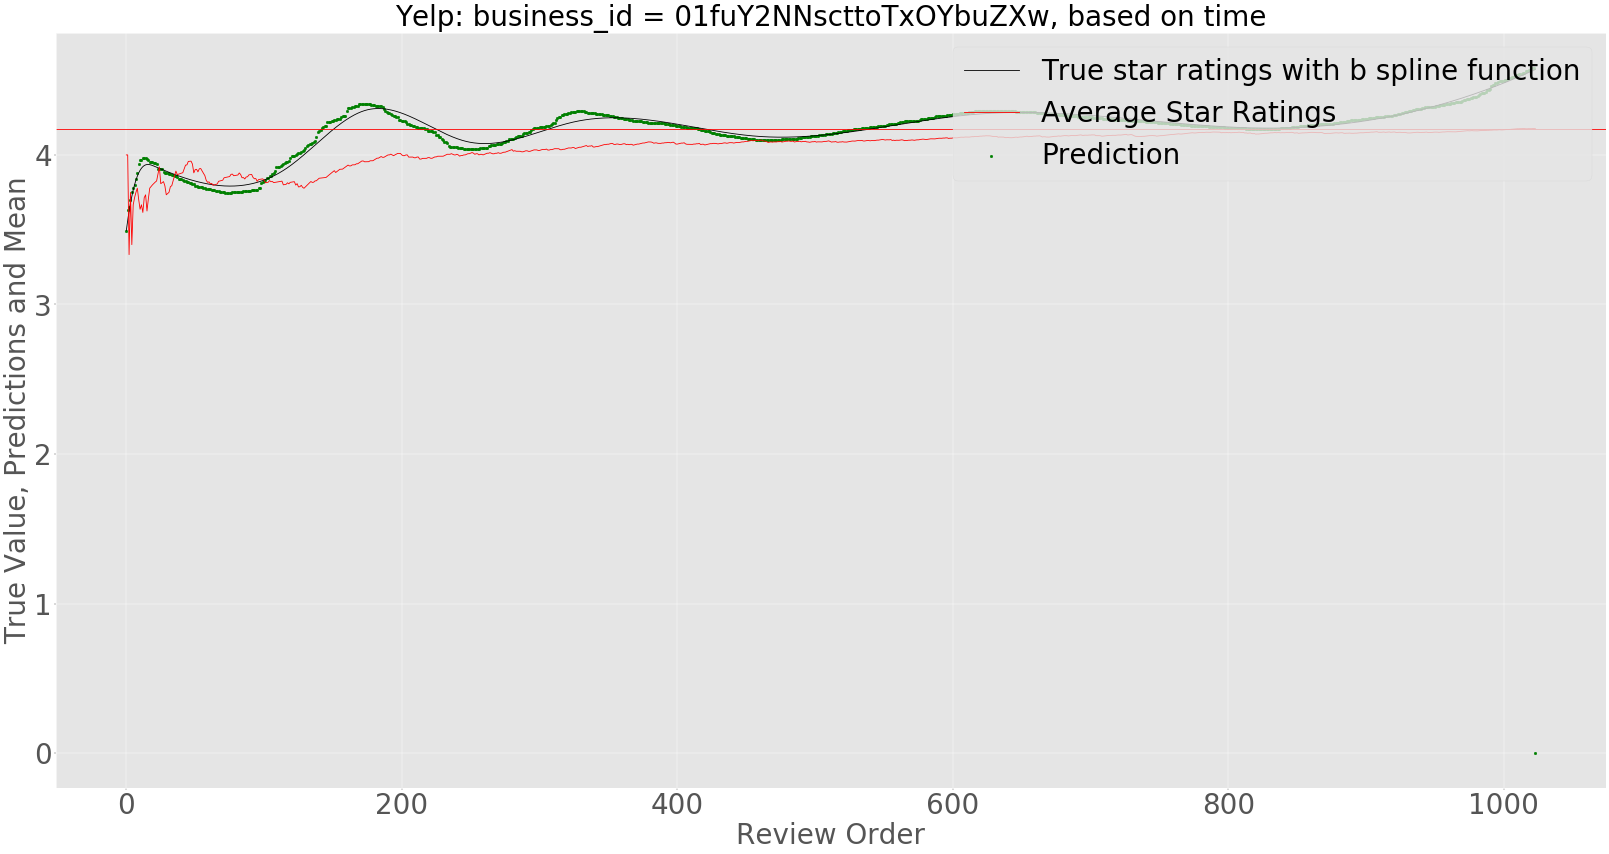

In [65]:
"""
--- plot figure ---

"""
# import data with prediction values
df_data = pd.read_csv(os.path.join(path,'dataframe_ready_to_use' ,'df_'+str(business_id)+'_'+str(knot_base)+'_with predictions.csv'))
df_data.index = df_business.index

# create datafram to plot and add average star ratings
preds = pd.DataFrame({"preds":df_data['prediction'], "true":df_data['stars']}) 
preds["residuals"] = preds["true"] - preds["preds"]
preds["average"] = df_business['average_stars'] 

# Bspline for smoothing the true values (true star ratings)
length = len(preds)
index = np.arange(length)
y = preds['true']
list_year = [list_knot_order[i] for i in range(1,len(list_knot_order)-1)]
t,c,k = splrep(index,y,s=0,k=3,t=list_year)
prediction_bspline = BSpline(t, c, k, extrapolate=False)
index_bspline = np.linspace(index.min(), index.max(), 20000)

# plot
plt.style.use('ggplot')
fig = plt.figure(dpi = 80/2, figsize = (100/2, 50/2))
plt.title('Yelp: business_id = '+str(business_id)+', based on '+str(knot_base),  fontdict={'size':'50'})
plt.subplot(1, 1, 1)

plt.scatter(index, preds['preds'], label='Prediction', color='g',s=25) 
plt.plot(index_bspline,prediction_bspline(index_bspline), label='True star ratings with b spline function', color='k')
#plt.plot(prediction_bspline[0],prediction_bspline[1],label='Prediction by splev',color='k')
plt.plot(index, preds['average'], label = 'Average Star Ratings', color = 'r')

plt.xlabel('Review Order', fontdict={'size':'50'})
plt.ylabel('True Value, Predictions and Mean', fontdict={'size':'50'})
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.axhline(y=preds['average'][len(preds)-1],color='r')
#plt.ylim(3.75,5)
#plt.xlim(0,1000)
plt.legend(loc='upper right',fontsize = 50)
plt.savefig(os.path.join(path,'results',str(business_id)+'_'+str(knot_base)+'.png'))
plt.show()    

In [21]:
print(business_id)
print(knot_base)

uWECX6-Uq9n8v5ipk9R29A
order
